# Digit Recognizer MNIST Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 2000)

In [2]:
train_df = pd.read_csv('./resources/train.csv')
test_df = pd.read_csv('./resources/test.csv')

In [3]:
train_df = train_df.sample(frac=1)
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [4]:
train_df.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [5]:
len(train_df)

42000

In [6]:
training = train_df.head(30000)
validation = train_df.tail(12000)
del train_df # free some memory

In [7]:
def one_hot_encode(labels, label_list):
    new_labels = []
    for lab in labels:
        y = np.zeros(len(label_list))
        y[label_list.index(lab)] = 1
        new_labels.append(y)
    return (new_labels)
def normalize_data(data):
    labels = []
    features = data.iloc[:, 1:] / 255
    try:
        labels = data['label']
        print('label len =', len(labels))
        sns.countplot(labels)
        labels = one_hot_encode(labels, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    except KeyError:
        pass
    return (features, labels)

label len = 30000


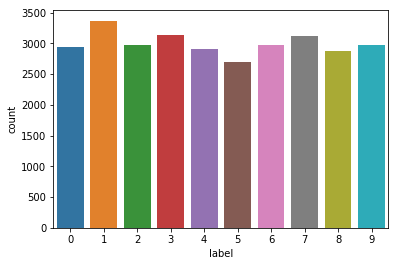

In [8]:
t_features, t_labels = normalize_data(training)
del training # free some memory

In [9]:
t_features.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

label len = 12000


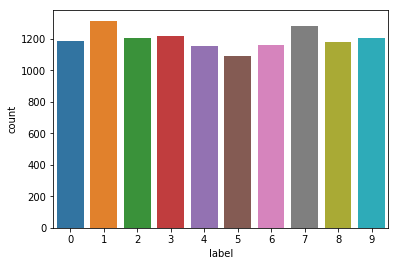

In [10]:
v_features, v_labels = normalize_data(validation)
del validation

In [11]:
v_features.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

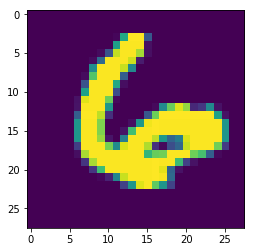

In [12]:
example = t_features.iloc[870].values
example = example.reshape((28, 28))
plt.imshow(example)

## Coding the Neural Network

In [7]:
class NeuralNetwork:
    def __init__(self, input_size, topology):
        """
        Specify the Network's architecture.
        
        Initializes weights and biases (He initialization) of the Network.
        
        Parameters
        ----------
        input_size : int
        Size of the input layer of the Network
        topology : tuple
        Tuple that contains the number of nodes per layer
        (e.g. (256, 128) --> 2 layers of 256 and 128 nodes respectively)
        """
        self.input_size = input_size
        self.topology = topology
        self.weights = []
        self.biases = []
        prev_layer_size = input_size
        for layer_size in topology:
            self.weights.append(np.random.randn(layer_size, prev_layer_size) * np.sqrt(2 / prev_layer_size))
            self.biases.append(np.zeros(layer_size))
            prev_layer_size = layer_size
    def softmax(self, vec):
        """Calculate the softmax of a vector."""
        ex_vec = np.exp(vec)
        return (ex_vec / sum(ex_vec))
    def forwardprop(self, x, y):
        """
        Forward propagation of the Network.
        
        Parameters
        ----------
        x : numpy array
        Current training example
        y : numpy array
        Current label example
        
        Returns
        -------
        ops : list
        Contains every vector calculated during the forward propagation from input to output (both included)
        loss : int
        Loss of the given the current training example
        """
        ops = [x]
        for i in range(len(self.topology)):
            z = np.matmul(self.weights[i], ops[-1]) + self.biases[i]
            if (i == len(self.topology) - 1):
                a = self.softmax(z)
            else:
                a = np.where(z < 0, 0, z)
            ops.append(z)
            ops.append(a)
        loss = -1 * np.log(np.dot(ops[-1], y))
        return (ops, loss)
    def backprop(self, l_rate, ops, y):
        """
        Backpropagation of the Network.
        
        Parameters
        ----------
        l_rate : float
        Learning rate
        ops : list
        Contains every vector calculated during the forward propagation
        y : numpy array
        Current label example
        
        Returns
        -------
        list
        Contains every gradient calculated during the backpropagation
        """
        grads = []
        grad_z = ops.pop() - y
        ops.pop()
        for i in range(len(self.topology)):
            grads.append(np.outer(grad_z, ops.pop()))
            grads.append(grad_z)
            if (i < len(self.topology) - 1):
                grad_prev_a = np.dot(self.weights[-i - 1].T, grad_z)
                grad_actv_funct = np.where(ops.pop() > 0, 1, 0)
                grad_z = grad_actv_funct * grad_prev_a
        
        # update weights and biases
        ret_grads = grads.copy()
        for i in range(len(self.topology)):
            a = grads.pop()
            b = grads.pop()
            self.biases[i] -= l_rate * a
            self.weights[i] -= l_rate * b
        return (ret_grads)
    def plot_stats(self, stats):
        """Plots training and validation's loss and accuracy."""
        df = pd.DataFrame(stats)
        df_loss = df.iloc[:, :2]
        df_acc = df.iloc[:, 2:4]
        f, ax = plt.subplots(figsize=(20, 15))
        plt.plot(df_loss, linewidth=4)
        f.legend(("Training", "Validation"), fontsize=25)
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=25)
        plt.xlabel('Steps', fontsize=25)
        plt.ylabel("Loss", fontsize=25)
        plt.title("Cross Entropy over whole dataset", fontsize=40);
        
        f, ax = plt.subplots(figsize=(20, 15))
        plt.plot(df_acc, linewidth=4)
        f.legend(("Training", "Validation"), fontsize=25)
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=25)
        plt.xlabel('Steps', fontsize=25)
        plt.ylabel("Accuracy", fontsize=25)
        plt.title("Accuracy over whole dataset", fontsize=40);
    def update_stats(self, t_features, t_labels, v_features, v_labels):
        """Saves new stats using the current weights and bias."""
        t_loss = 0
        t_acc = 0
        v_loss = 0
        v_acc = 0
        for x, y in zip(t_features, t_labels):
            ops, loss = self.forwardprop(x, y)
            t_loss += loss
            ind = np.argmax(ops[-1])
            t_acc += y[ind]
        t_loss /= len(t_features)
        t_acc /= len(t_features)
        for x, y, in zip(v_features, v_labels):
            ops, loss = self.forwardprop(x, y)
            v_loss += loss
            ind = np.argmax(ops[-1])
            v_acc += y[ind]
        v_loss /= len(v_features)
        v_acc /= len(v_features)
        print('training:\n loss:', t_loss, 'accuracy:', t_acc)
        print('validation:\n loss:', v_loss, 'accuracy', t_acc)
        print()
        return ((t_loss, v_loss, t_acc, v_acc))
    def next_batch(self, features, labels, batch_size):
        """Yield the next batch for training."""
        for i in range(0, len(features), batch_size):
            yield features[:][i:i + batch_size], labels[i:i + batch_size]
    def training(self, t_features, t_labels, v_features, v_labels, l_rate, epochs, batch_size, plot_steps):
        """
        Function to train the Network.
        
        Parameters
        ----------
        t_features : numpy array
        Training features
        t_labels : numpy array
        Training labels
        v_features : numpy array
        Validation features
        v_labels : numpy array
        Validation labels
        l_rate : float
        Learning rate
        epochs : int
        Epochs of training
        batch_size : int
        Batch size for training
        plot_steps : int
        The amount of steps to take before plotting
        
        Returns
        -------
        List of tuples containing training and validation's loss and accuracy
        """
        steps = 0
        stats = []
        for epoch_nb in range(epochs):
            generator = self.next_batch(t_features, t_labels, batch_size)
            for batch_x, batch_y in generator:
                batch_loss = 0
                for x, y in zip(batch_x, batch_y):
                    ops, loss = self.forwardprop(x, y)
                    batch_loss += loss
                    if (steps % plot_steps == 0):
                        stats.append(self.update_stats(t_features, t_labels, v_features, v_labels))
                    steps += 1
                batch_loss /= batch_size
                self.backprop(l_rate, ops, y)
        return (stats)

In [14]:
nn = NeuralNetwork(input_size=784, topology=(512, 10))

In [15]:
test_features = t_features.values
test_labels = t_labels
val_features = v_features.values
val_labels = v_labels

In [16]:
loss_plot = nn.training(test_features, test_labels, val_features, val_labels, l_rate=0.01, epochs=5, batch_size=75, plot_steps=2000)

training:
 loss: 2.531981859861285 accuracy: 0.0835
validation:
 loss: 2.533425308009824 accuracy 0.0835

training:
 loss: 2.142336977315019 accuracy: 0.2622333333333333
validation:
 loss: 2.1457817440844926 accuracy 0.2622333333333333

training:
 loss: 1.8548013947637672 accuracy: 0.46563333333333334
validation:
 loss: 1.8630868465488246 accuracy 0.46563333333333334

training:
 loss: 1.6860768735513618 accuracy: 0.4609333333333333
validation:
 loss: 1.6939014549559184 accuracy 0.4609333333333333

training:
 loss: 1.5416169811668328 accuracy: 0.5285333333333333
validation:
 loss: 1.5481011481784062 accuracy 0.5285333333333333

training:
 loss: 1.4645578728527147 accuracy: 0.5420666666666667
validation:
 loss: 1.472630576182165 accuracy 0.5420666666666667

training:
 loss: 1.3396917668101331 accuracy: 0.5884
validation:
 loss: 1.3476678170318073 accuracy 0.5884

training:
 loss: 1.3518445465210696 accuracy: 0.5565333333333333
validation:
 loss: 1.3620573628444428 accuracy 0.556533333333

training:
 loss: 0.5202153155870861 accuracy: 0.8375333333333334
validation:
 loss: 0.5215561761128074 accuracy 0.8375333333333334

training:
 loss: 0.531706506443996 accuracy: 0.8319
validation:
 loss: 0.5352469480391784 accuracy 0.8319

training:
 loss: 0.5634572538502298 accuracy: 0.8192666666666667
validation:
 loss: 0.5644359047000553 accuracy 0.8192666666666667

training:
 loss: 0.5631234828875068 accuracy: 0.8183666666666667
validation:
 loss: 0.5570175485960255 accuracy 0.8183666666666667

training:
 loss: 0.5202146072319221 accuracy: 0.8368
validation:
 loss: 0.5147920890343025 accuracy 0.8368

training:
 loss: 0.523183876442054 accuracy: 0.8339666666666666
validation:
 loss: 0.517027675059246 accuracy 0.8339666666666666

training:
 loss: 0.5265644796529019 accuracy: 0.8318333333333333
validation:
 loss: 0.5239526596774969 accuracy 0.8318333333333333

training:
 loss: 0.5044354236740578 accuracy: 0.8422666666666667
validation:
 loss: 0.5014379188976794 accuracy 0.8422666666666

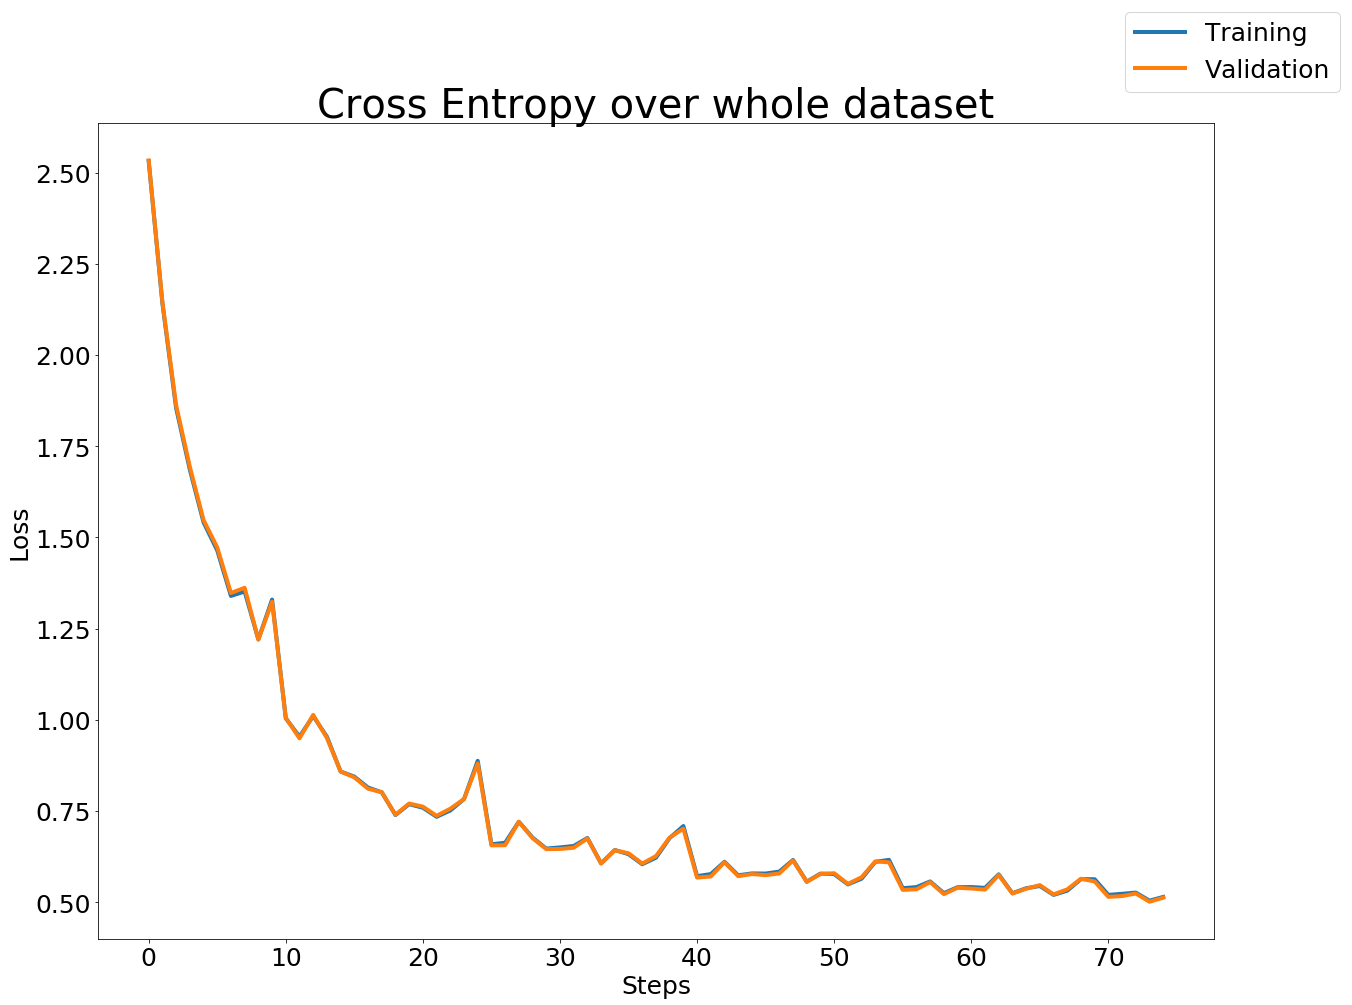

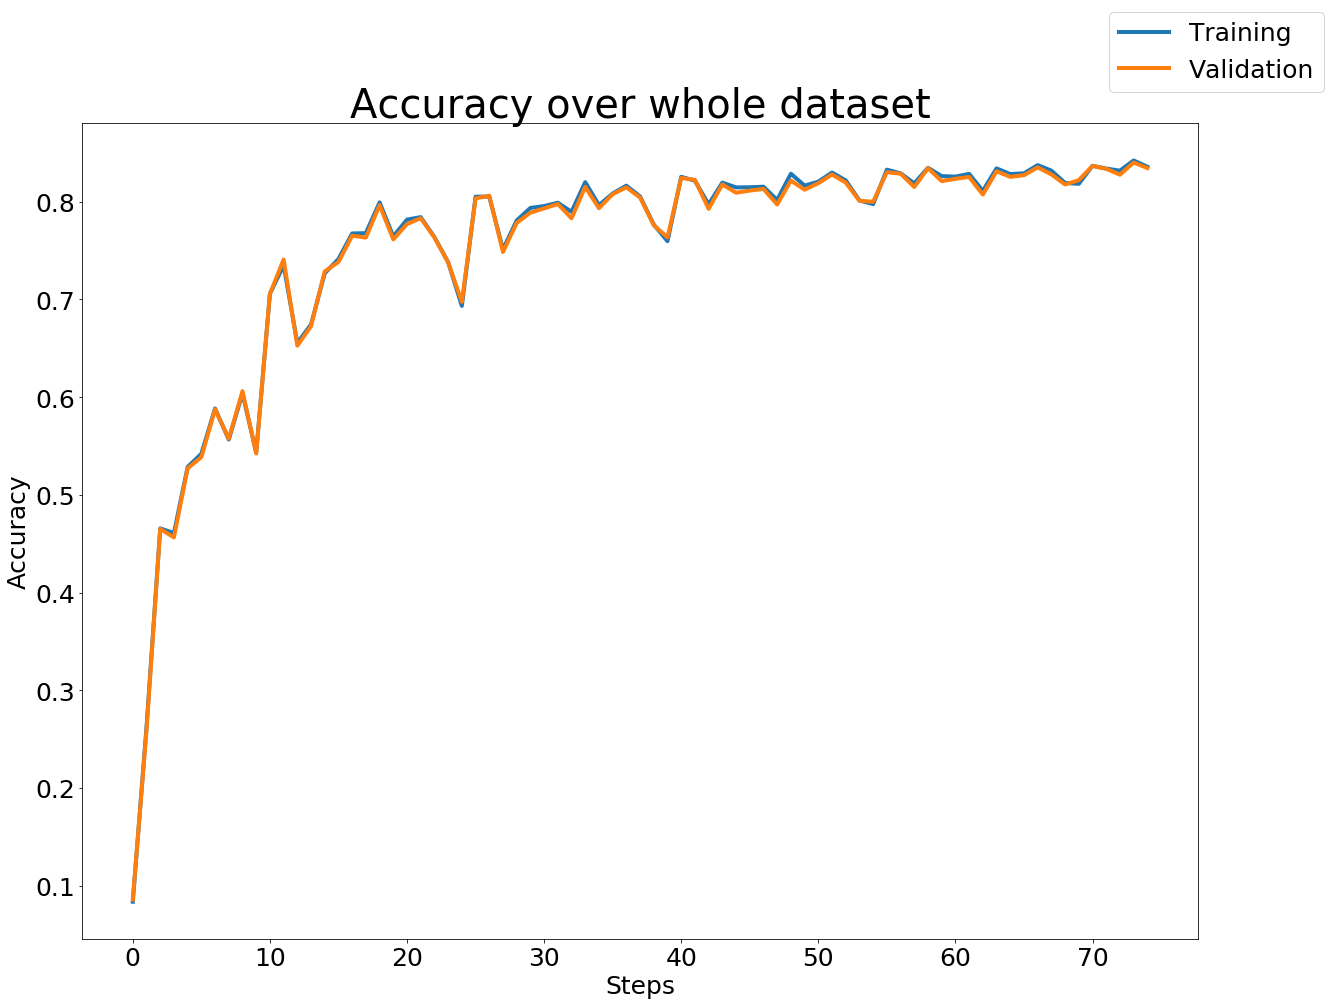

In [17]:
nn.plot_stats(loss_plot)